# Classifying Water Pixels

In [6]:
import os

import rasterio 
import rasterio.features
import rasterio.warp
from rasterio import mask
import numpy as np

import matplotlib.pyplot as plt

In [7]:
# output directories 
TMP_OUTPUT_DIR = "./output/tmp/"
FNL_OUTPUT_DIR = "./output/"

s1_corrected_path = os.path.join(FNL_OUTPUT_DIR, "corrected_output.tif")

## Visualize Preprocessing Result

/home/hafenkran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


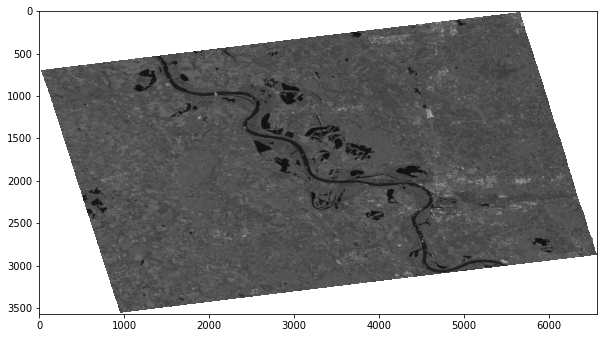

In [17]:
with rasterio.open(s1_corrected_path) as dataset:
    image = dataset.read(2)
    image = 10*np.log(image)
    image_bbox = dataset.bounds
    plt.figure(figsize=(10,15))
    plt.imshow(image, cmap='gray')
    plt.show()

## Thresholding

Identified threshold according to Otsu: -30.272598266601562


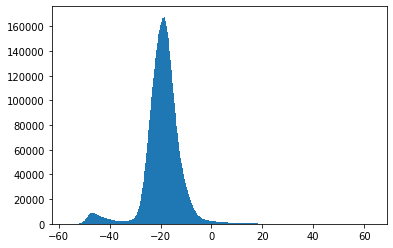

In [9]:
from skimage.filters import threshold_otsu
p = plt.hist(image[~np.isinf(image)], bins=1000)
ot = threshold_otsu(image[~np.isinf(image)])

print(f"Identified threshold according to Otsu: {ot}")

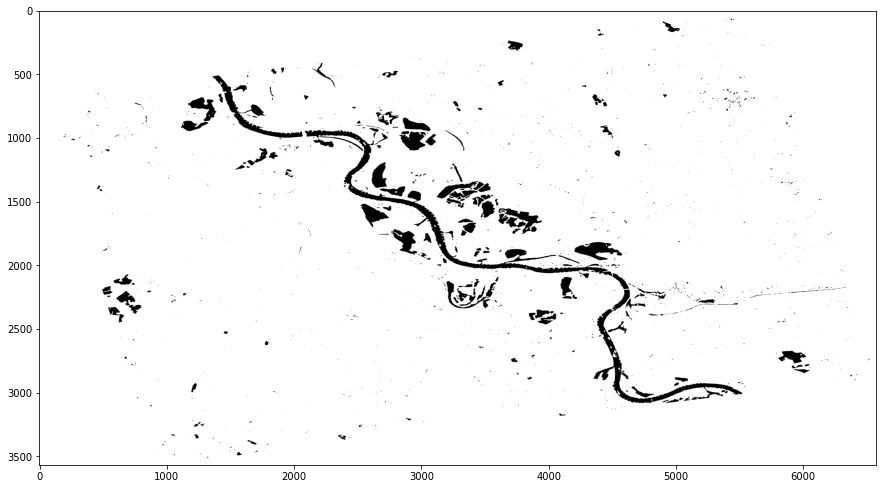

In [11]:
# compute an otsu threshold
from skimage.filters import threshold_otsu

inf_mask = np.isinf(image)
water_mask = image.copy()
water_mask[inf_mask] = ot + 1
water_mask = water_mask > ot
water_mask[inf_mask] = -np.inf

plt.figure(figsize=(15,20))
plt.imshow(water_mask, cmap='gray')
plt.show()

## Interactive Visualization

In [21]:
import folium

m = folium.Map(zoom_start=2)

folium.raster_layers.ImageOverlay(
    image=water_mask,
    bounds=[[image_bbox.bottom, image_bbox.left], [image_bbox.top, image_bbox.right]],
    colormap=lambda x: (x, x, x, max(1.5-x, 0))
).add_to(m)

m